In [1]:
import pygplates
import pandas as pd
import sys
sys.path.append('/Users/Simon/GIT/PlateTectonicTools/')
#import ptt.subduction_convergence as sc
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

print pygplates.__version__

from reconstruction_classes import *


2.1.0.19


In [2]:
# Build an object describing a reconstruction model

M2016 = ReconstructionModel('Matthews++2016')
M2016.add_rotation_model('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/Rotations/Matthews_etal_GPC_2016_410-0Ma_GK07.rot')
M2016.add_static_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/StaticPolygons/Muller_etal_AREPS_2016_StaticPolygons.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_Paleozoic_PlateTopologies.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_TopologyBuildingBlocks.gpmlz')


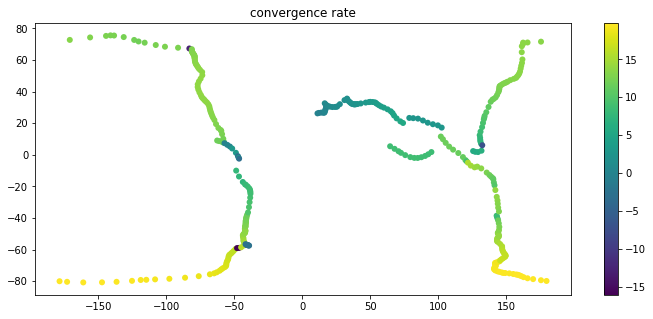

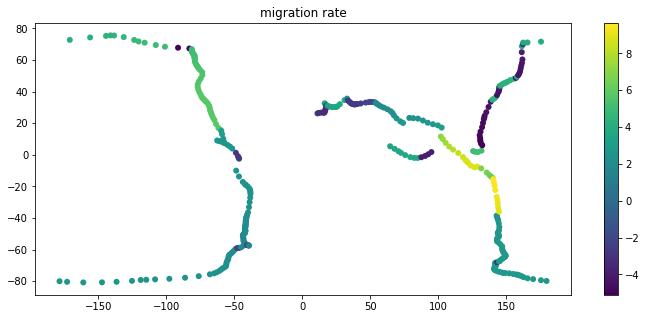

In [3]:
# compute the subduction zone kinematics for a single time snapshot
# results are returned in a 'SubductionConvergence' class object

subduction_kinematics_120Ma = SubductionConvergence(M2016,120.,threshold_sampling_distance_radians=5.)

subduction_kinematics_120Ma.plot('cr')
subduction_kinematics_120Ma.plot('mr')



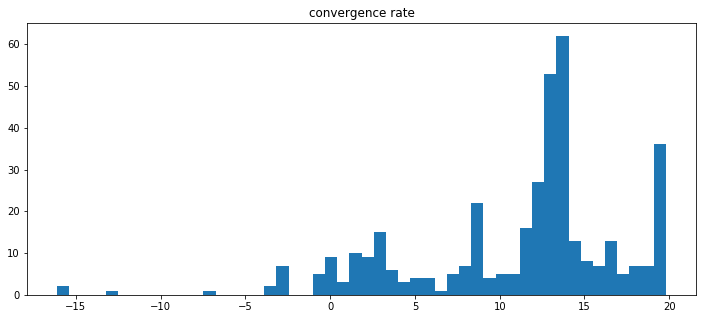

In [7]:
subduction_kinematics_120Ma.hist('cr')

In [5]:
subduction_kinematics = SubductionConvergence(M2016,np.arange(0,201,10),threshold_sampling_distance_radians=5.)


Unable to find the overriding and subducting plates of the subducting shared sub-segment "Sandwich Trench" at 0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Mussau Trench" at 0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding and subducting plates of the subducting shared sub-segment "South America trench taken from COB file" at 0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding plate of the subducting shared sub-

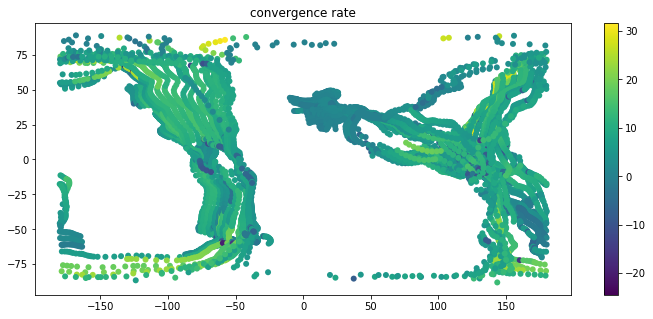

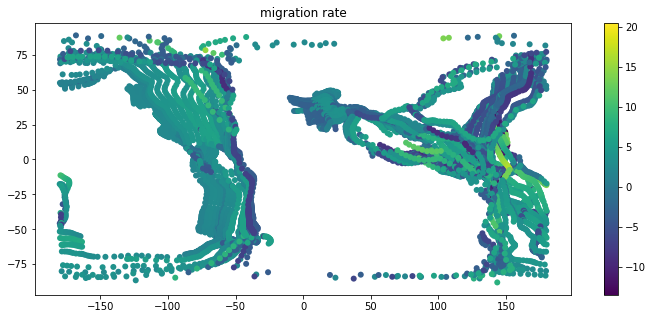

In [6]:
subduction_kinematics.plot('cr')
subduction_kinematics.plot('mr')



In [10]:

mr = np.asarray(subduction_kinematics.df['migr_rate'])
mo = np.asarray(subduction_kinematics.df['migr_obliq'])
subduction_kinematics.df['ortho_migr_rate'] = pd.Series(mr*np.sin(np.radians(np.abs(mo))), index=subduction_kinematics.df.index)

cr = np.asarray(subduction_kinematics.df['conv_rate'])
co = np.asarray(subduction_kinematics.df['conv_obliq'])
subduction_kinematics.df['ortho_conv_rate'] = pd.Series(cr*np.abs(np.cos(np.radians(co))), index=subduction_kinematics.df.index)



In [13]:
subduction_kinematics.df.head()

,lon,lat,conv_rate,conv_obliq,migr_rate,migr_obliq,arc_length,arc_azimuth,subducting_plate,overriding_plate,time,ortho_migr_rate,ortho_conv_rate
0,-179.373795,-11.321178,9.157936,65.996958,10.327195,-134.407560,1.016692,196.319209,901,801,0,7.377545,3.725312
1,-178.352226,-11.842482,9.067397,46.531094,9.912845,-153.039844,1.275456,216.396194,901,801,0,4.494194,6.238014
2,-177.749312,-32.016022,5.748449,-26.679372,-4.610512,56.324450,7.853311,286.129015,901,801,0,-3.836825,5.136429
3,-177.175259,-12.710949,8.925273,46.065458,9.332430,-152.684862,1.606997,217.555986,901,801,0,4.282506,6.192677
4,-176.323698,-26.874407,9.155036,-7.990859,4.037190,109.560561,1.901822,276.936919,901,821,0,3.804197,9.066143
